In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go

def euclidean_squared(p1, p2): #euclidean squared distance
    return np.sqrt(np.sum((p1 - p2)**2))

# K-means clustering
def kmeans(data, k, max_iters=100, tol=1e-4):
    np.random.seed(0)
    # Randomly initialize centroids
    initial_indices = np.random.choice(len(data), k, replace=False)
    centroids = data[initial_indices]

    for iteration in range(max_iters):
        labels = [] #Assigns the clusters
        for point in data:
            distances = [euclidean_squared(point, centroid) for centroid in centroids]
            label = np.argmin(distances)
            labels.append(label)
        labels = np.array(labels)

        # Update centroids
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])

        # Check for convergence
        shift = np.sum((centroids - new_centroids)**2)
        if shift < tol:
            print(f"Converged after {iteration} iterations.")
            break

        centroids = new_centroids

    return centroids, labels


def plot_clusters_3d_interactive(data, centroids, labels, song_names):
    trace = go.Scatter3d( #displays scatter plot
        x=data[:, 0],
        y=data[:, 1],
        z=data[:, 2],
        mode='markers',
        marker=dict(size=5, color=labels, colorscale='Viridis'),
        text=song_names,  # displays the song name on hover
        hoverinfo='text'
    )

    centroids_trace = go.Scatter3d( #centroids plot
        x=centroids[:, 0],
        y=centroids[:, 1],
        z=centroids[:, 2],
        mode='markers+text',
        marker=dict(size=10, color='black'),
        text=["Centroid " + str(i+1) for i in range(len(centroids))],
        textposition="top center",
        hoverinfo='text'
    )

    layout = go.Layout( #3D plot layout
        title="K-Means Clustering (3D Visualization with Song Names)",
        scene=dict(
            xaxis_title="PC1",
            yaxis_title="PC2",
            zaxis_title="PC3"
        ),
        showlegend=False
    )

    fig = go.Figure(data=[trace, centroids_trace], layout=layout)
    fig.show()

Converged after 67 iterations.


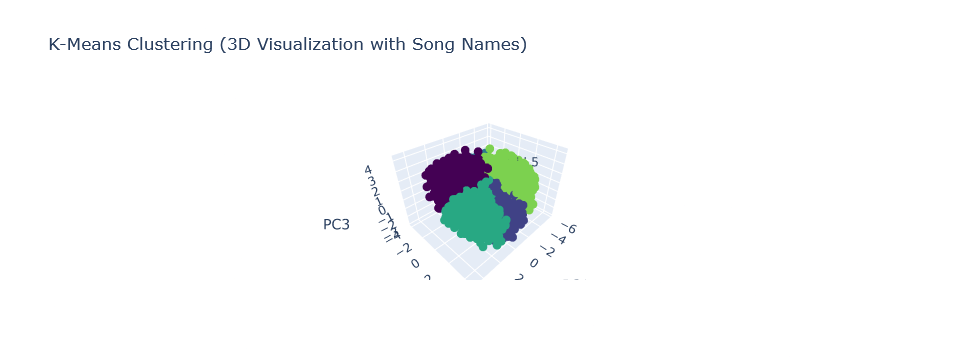

In [3]:
if __name__ == "__main__":
    pca_file_path = "data/cleaned_Tscores.csv"
    data = np.loadtxt(pca_file_path, delimiter=",")  # CSV file with 3 columns of PCA scores


    song_file_path = "data/cleaned_mega.csv"
    song_df = pd.read_csv(song_file_path)
    song_names = song_df['Track Name'].tolist()  # Extract the 'title tracks' column

    assert len(song_names) == len(data), "Mismatch between number of song names and PCA score entries."

    k = 6  # number of genres
    centroids, labels = kmeans(data, k)
    plot_clusters_3d_interactive(data, centroids, labels, song_names)

In [13]:
import matplotlib.pyplot as plt

def compute_inertia(data, centroids, labels):
    inertia = 0
    for i in range(len(data)):
        cluster_idx = labels[i]
        inertia += np.sum((data[i] - centroids[cluster_idx]) ** 2)
    return inertia

def elbow_method(data, max_k=10):
    inertias = []
    K_range = range(1, max_k + 1)
    
    for k in K_range:
        centroids, labels = kmeans(data, k)
        inertia = compute_inertia(data, centroids, labels)
        inertias.append(inertia)
    
    plt.figure(figsize=(8,5))
    plt.plot(K_range, inertias, 'bo-')
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Inertia (WCSS)")
    plt.title("Elbow Method For Optimal k")
    plt.grid(True)
    plt.show()

Converged after 1 iterations.
Converged after 23 iterations.
Converged after 12 iterations.
Converged after 17 iterations.
Converged after 18 iterations.
Converged after 67 iterations.
Converged after 35 iterations.
Converged after 86 iterations.
Converged after 81 iterations.
Converged after 24 iterations.


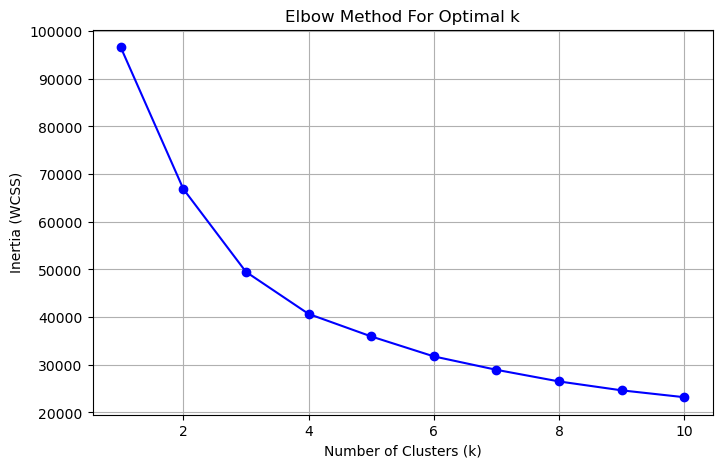

In [15]:
elbow_method(data, max_k=10)